# Poiseuille en EF

In [1]:
from trustutils import run 

run.introduction('D. Jamet')
run.description("Calculs menés en EF, delta p imposé")
run.TRUST_parameters()

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description 
Calculs menés en EF, delta p imposé

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Pois_impl_3D/build)

In [2]:
from trustutils import run 
import os
c1 = run.addCase(".","Pois_impl_3D.data")
run.printCases()
run.runCases()

### Test cases 
* ./Pois_impl_3D.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 13.0s.


## Resultats
 
### vitesse_x 

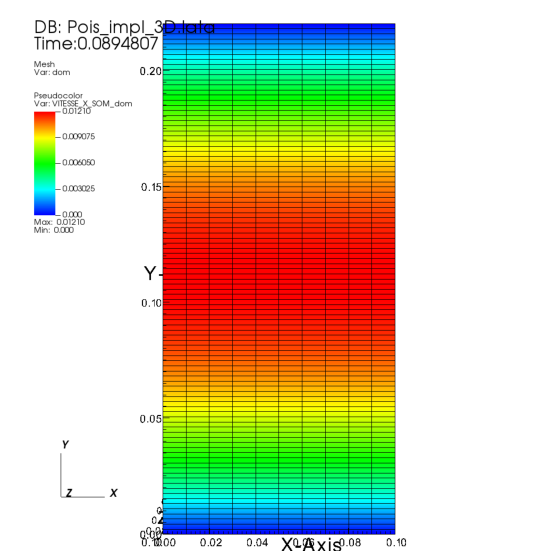

In [3]:
from trustutils import visit

Graphique=visit.showField("./Pois_impl_3D.lata","Pseudocolor","VITESSE_X_SOM_dom") 

### Différence entre champ de pression calculé et champ de pression analytique
Ce champ doit être nul.

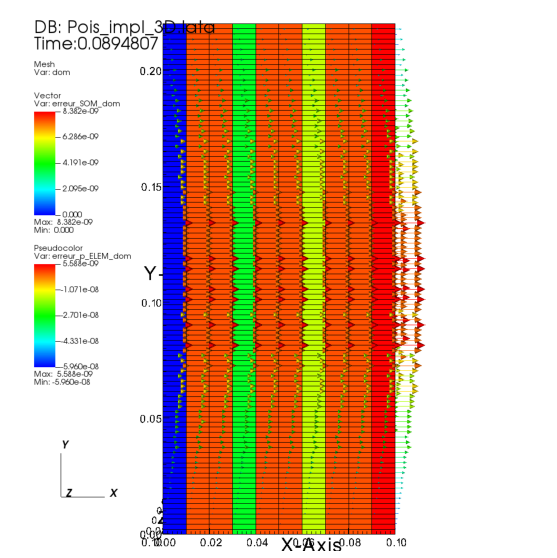

In [4]:
from trustutils import visit

Graphique=visit.Show("./Pois_impl_3D.lata","Mesh","dom") 
Graphique.visitCommand("DefineVectorExpression(\"erreur_SOM_dom\",\"VITESSE_SOM_dom-{(coord(dom)[1])*(0.22-coord(dom)[1]),0,0}\")")
Graphique.visitCommand("DefineScalarExpression(\"sol_p_ELEM_dom\",\"PRESSION_PA_ELEM_dom*0-(coord(dom)[0]-0.1)*6\")")
Graphique.visitCommand("DefineScalarExpression(\"erreur_p_ELEM_dom\",\"PRESSION_PA_ELEM_dom-sol_p_ELEM_dom\")")
Graphique.addField("./Pois_impl_3D.lata","Vector","erreur_SOM_dom")
Graphique.addField("./Pois_impl_3D.lata","Pseudocolor","erreur_p_ELEM_dom")
Graphique.plot()

## Data Files
### Pois_impl_3D

In [6]:
from trustutils import run

run.dumpDataset("./Pois_impl_3D.data")

 # Hydraulique 2D laminaire avec "trou" dans le maillage #
 # PARALLEL OK #
 dimension 3
 Pb_hydraulique pb
 Domaine dom
 # BEGIN MESH #
 Mailler dom 
 {
 	 Pave Entree
 	 	 {
 	 	 Origine 0. 0. 0.
 	 	 Nombre_de_Noeuds 11 101 3
 	 	 Longueurs 0.1 0.22 0.1
 	 	 }
 	 	 {
 	 	 bord Entree X = 0. 0. <= Y <= 0.22   0. <= Z <= 0.1
 	 	 bord Symetrie Y = 0.22 0. <= X <= 0.1 0. <= Z <= 0.1
 	 	 bord Symetrie Y = 0. 0. <= X <= 0.1 0. <= Z <= 0.1
 	 	 bord Sortie X = 0.1 0. <= Y <= 0.22 0. <= Z <= 0.1
 	 	 bord sym  Z = 0. 0. <= X <= 0.1  0. <= Y <= 0.22
 	 	 bord sym  Z = 0.1 0. <= X <= 0.1  0. <= Y <= 0.22
 	 	 } 
 }
 # END MESH #
 # BEGIN PARTITION
 
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 1 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 EF dis
 
 Scheme_euler_implicit sch2
 Read sch2
 {
 	 tinit 0
 	 dt_min 5.e-8
 	 dt_impr 5.e-1
 	 dt_sauv 1
 	 seuil_statio 1.e-7
 	 solveur implicite { 
 	 	 solveu